In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("housing.csv")#read the data

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()#to get the information of the data and see if null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)#drop the missing values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [16]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'],axis=1)#drop the target variable
y=data['median_house_value']#target variable

In [17]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [18]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)#split the data into training and testing data, 0.2 tells 20% of data is reserved for testing

In [20]:
train_data=x_train.join(y_train)#join the training data

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12317,-116.69,33.50,13.0,1187.0,255.0,442.0,179.0,1.9107,INLAND,155700.0
16231,-121.31,37.98,47.0,3386.0,663.0,1228.0,619.0,3.0625,INLAND,141500.0
12415,-116.21,33.72,28.0,2488.0,714.0,2891.0,676.0,2.3169,INLAND,68900.0
4940,-118.27,33.99,35.0,932.0,294.0,1153.0,282.0,1.4886,<1H OCEAN,100000.0
8222,-118.23,33.76,21.0,49.0,14.0,29.0,16.0,5.0000,NEAR OCEAN,87500.0
...,...,...,...,...,...,...,...,...,...,...
20142,-119.06,34.36,52.0,1239.0,320.0,934.0,298.0,1.8618,<1H OCEAN,183300.0
2066,-119.82,36.64,30.0,1694.0,312.0,1008.0,321.0,2.2466,INLAND,96000.0
1289,-121.79,38.01,17.0,4032.0,814.0,1749.0,618.0,3.1728,INLAND,146800.0
19712,-121.64,39.15,15.0,2659.0,396.0,1159.0,407.0,5.2340,INLAND,124900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

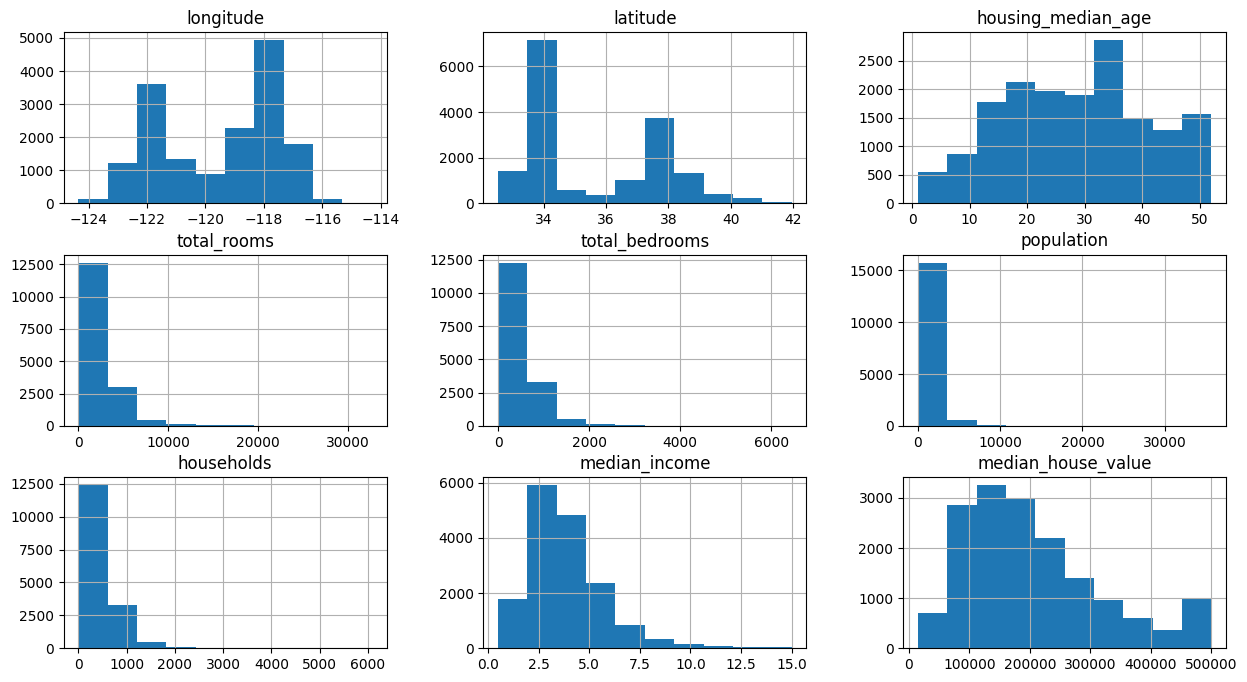

In [22]:
train_data.hist(figsize=(15,8))

In [24]:
train_data.select_dtypes(include=[np.number]).corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924104,-0.111513,0.047894,0.071536,0.099534,0.058113,-0.012068,-0.042421
latitude,-0.924104,1.000000,0.014359,-0.038972,-0.068543,-0.108525,-0.073449,-0.083159,-0.147401
housing_median_age,-0.111513,0.014359,1.000000,-0.360741,-0.317943,-0.291939,-0.300609,-0.118074,0.105370
total_rooms,0.047894,-0.038972,-0.360741,1.000000,0.929185,0.847751,0.916579,0.198636,0.134018
total_bedrooms,0.071536,-0.068543,-0.317943,0.929185,1.000000,0.870829,0.978434,-0.012387,0.046393
population,0.099534,-0.108525,-0.291939,0.847751,0.870829,1.000000,0.901828,0.001242,-0.027921
households,0.058113,-0.073449,-0.300609,0.916579,0.978434,0.901828,1.000000,0.009451,0.061767
median_income,-0.012068,-0.083159,-0.118074,0.198636,-0.012387,0.001242,0.009451,1.000000,0.690804
median_house_value,-0.042421,-0.147401,0.105370,0.134018,0.046393,-0.027921,0.061767,0.690804,1.000000


<Axes: >

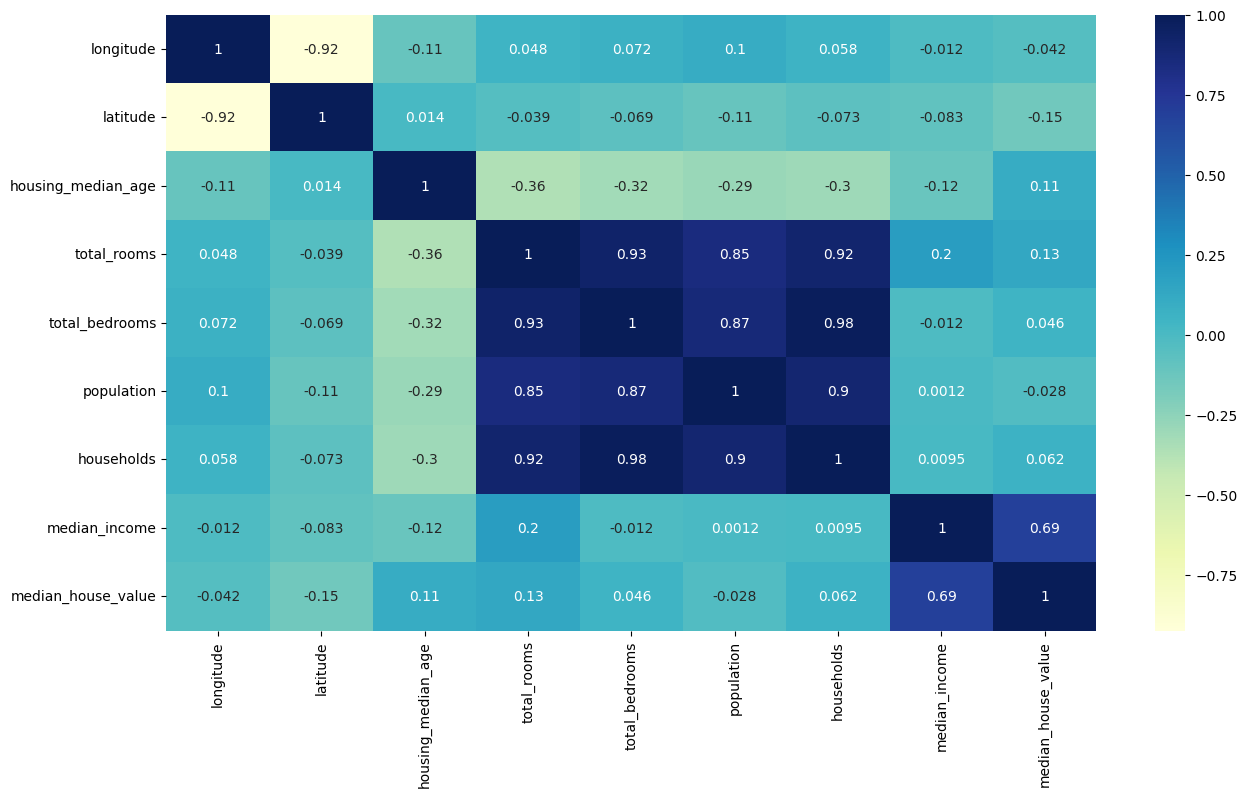

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=[np.number]).corr(),annot=True,cmap="YlGnBu")

In [27]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1

In [33]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']) + 1
train_data['population'] = np.log(train_data['population']) + 1
train_data['households'] = np.log(train_data['households']) + 1

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

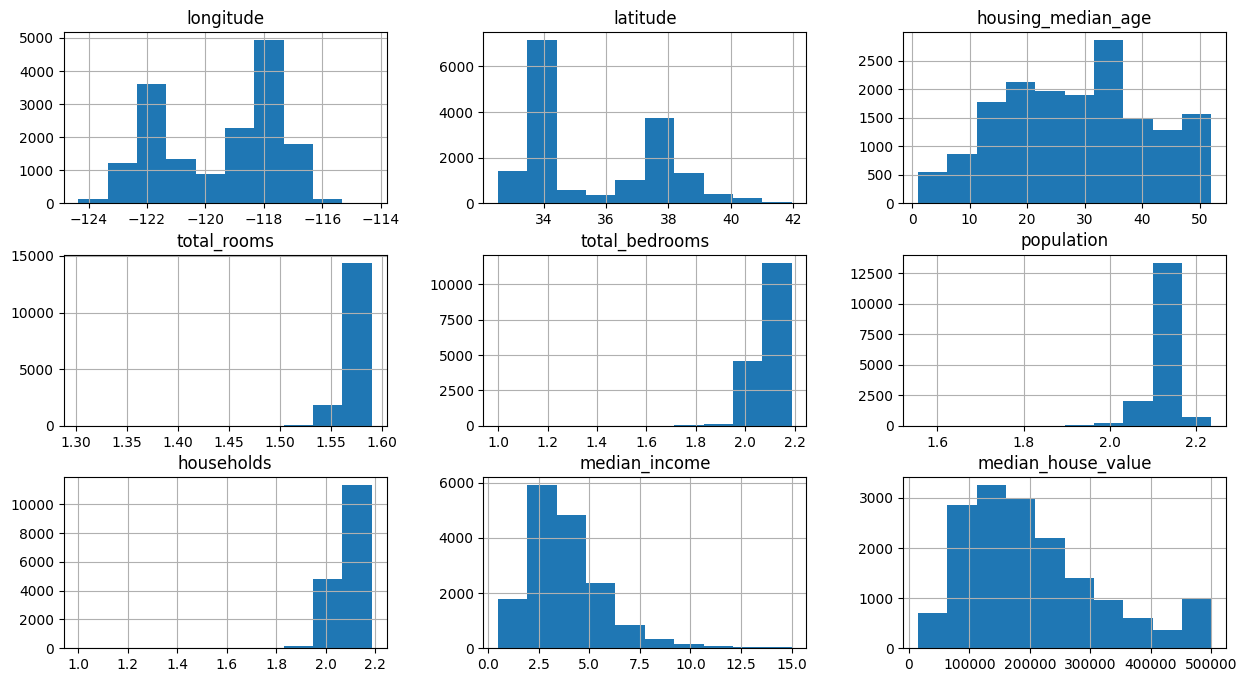

In [34]:
train_data.hist(figsize=(15,8))

In [35]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7240
INLAND        5173
NEAR OCEAN    2122
NEAR BAY      1807
ISLAND           4
Name: count, dtype: int64

In [41]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop('ocean_proximity',axis=1)

In [42]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12317,-116.69,33.50,13.0,1.562557,2.057141,2.084807,2.037628,1.9107,155700.0,0,1,0,0,0
16231,-121.31,37.98,47.0,1.572781,2.103425,2.129298,2.100368,3.0625,141500.0,0,1,0,0,0
12415,-116.21,33.72,28.0,1.569971,2.106683,2.161216,2.104283,2.3169,68900.0,0,1,0,0,0
4940,-118.27,33.99,35.0,1.559900,2.064591,2.126774,2.062432,1.4886,100000.0,1,0,0,0,0
8222,-118.23,33.76,21.0,1.511743,1.829305,1.905894,1.844907,5.0000,87500.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20142,-119.06,34.36,52.0,1.563015,2.068927,2.118144,2.065288,1.8618,183300.0,1,0,0,0,0
2066,-119.82,36.64,30.0,1.566246,2.067639,2.121303,2.069085,2.2466,96000.0,0,1,0,0,0
1289,-121.79,38.01,17.0,1.574309,2.112343,2.142997,2.100295,3.1728,146800.0,0,1,0,0,0
19712,-121.64,39.15,15.0,1.570590,2.079515,2.126983,2.080845,5.2340,124900.0,0,1,0,0,0


<Axes: xlabel='longitude', ylabel='latitude'>

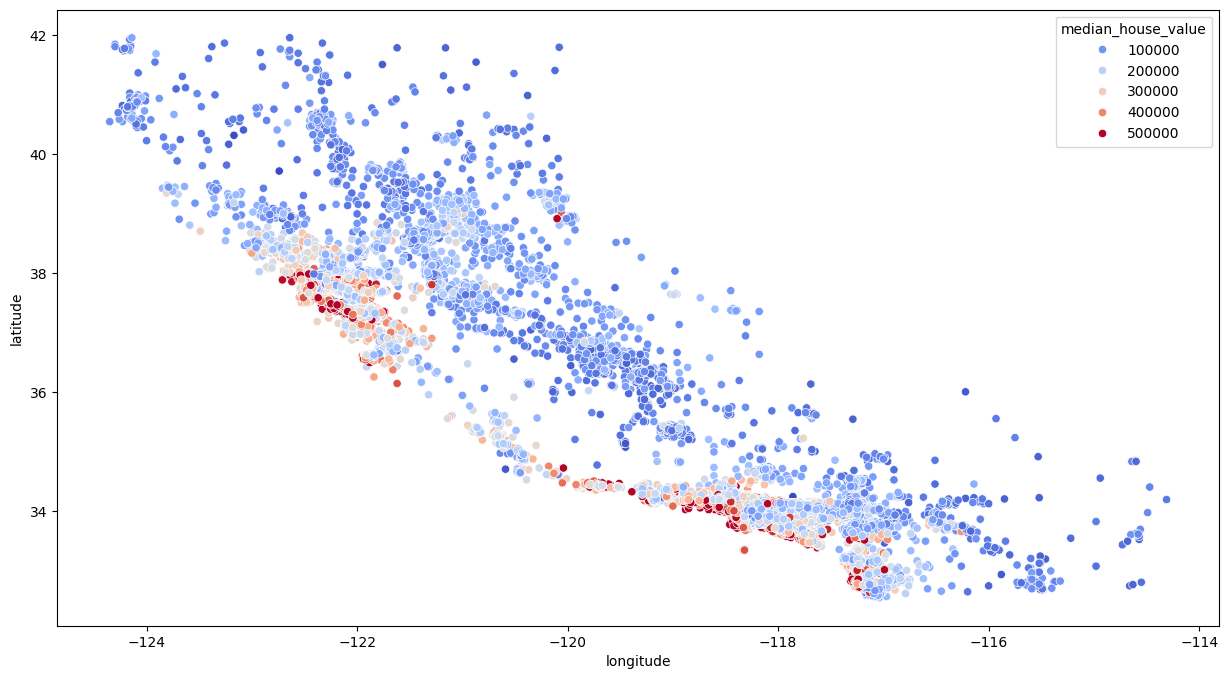

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude',y='latitude',data=train_data,hue='median_house_value',palette='coolwarm')